### Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab. Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.

### 1) [3v] Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as sklearn’s default):

### a. Plot two boxplots with the fold accuracies for each classifier.

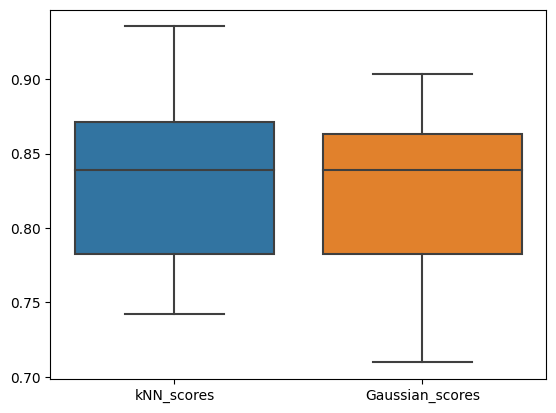

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

from scipy.io.arff import loadarff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

# kNN
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)

# Bayesian
gnb = GaussianNB()
gnb.fit(X, y)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Cross-validation for kNN
knn_scores = cross_val_score(neigh, X, y, cv=cv)

# Cross-validation for Gaussian Naive Bayes
gnb_scores = cross_val_score(gnb, X, y, cv=cv)


# Boxplot 
data = pd.DataFrame({
    'label1': "Knn",
    'kNN_scores': knn_scores,
    'label2': "Gnb",
    'Gaussian_scores': gnb_scores
})

sns.boxplot(data=data)

# Show the plot
plt.show()

### b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding accuracy”, asserting whether is true.

In [5]:
from scipy import stats

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='greater')
print("knn > gnb ? p-value=",res.pvalue)

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='less')
print("knn < gnb ? p-value=",res.pvalue)

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='two-sided')
print("knn != gnb ? p-value=",res.pvalue)

knn > gnb ? p-value= 0.19042809062064092
knn < gnb ? p-value= 0.8095719093793591
knn != gnb ? p-value= 0.38085618124128184


Baseado nestes p-values e usando um nível de significância de 0.05, não há uma diferença estatisticamente significativa entre os modelos kNN e naive Bayes. Desta forma, não podemos afirmar com confiança que um modelo é superior ao outro, relativamente ao dataset column-diagnosis.

### 2) [2.5v] Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.

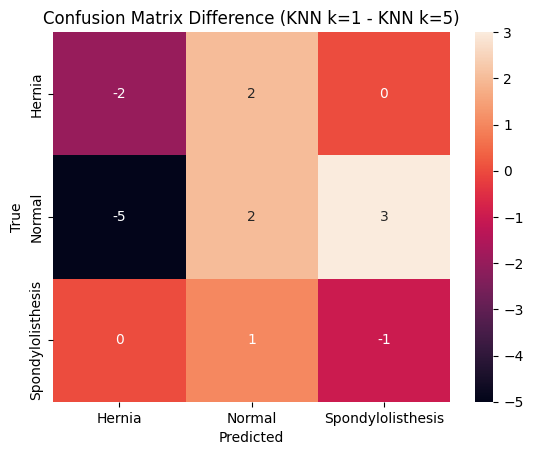

[[ 37  23   0]
 [ 14  80   6]
 [  1   7 142]] [[ 39  21   0]
 [ 19  78   3]
 [  1   6 143]]


In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Create models
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')

knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Initialize SKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize confusion matrices arrays
confusion_matrices_knn1 = []
confusion_matrices_knn5 = []

# Cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn1.fit(X_train, y_train)
    knn1_pred = knn1.predict(X_test)
    
    knn5.fit(X_train, y_train)
    knn5_pred = knn5.predict(X_test)
    
    confusion_matrices_knn1.append(confusion_matrix(y_test, knn1_pred))
    confusion_matrices_knn5.append(confusion_matrix(y_test, knn5_pred))

# Calculate the final confusion matrices for each model
confusion_matrix_knn1 = np.sum(confusion_matrices_knn1, axis=0)
confusion_matrix_knn5 = np.sum(confusion_matrices_knn5, axis=0)

# Result confusion matrix
confusion_matrix = confusion_matrix_knn1 - confusion_matrix_knn5

# Plotting
labels = ['Hernia', 'Normal', 'Spondylolisthesis']
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix Difference (KNN k=1 - KNN k=5)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(confusion_matrix_knn1, confusion_matrix_knn5)


### 3) [1.5v] Considering the unique properties of column_diagnosis, identify three possible difficulties of naïve Bayes when learning from the given dataset.

Disadvantages

This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.
Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 

1 - O dataset trabalha com várias variáveis relacionadas entre si. Naive Bayes assume que todos os parâmetros são independentes, o que leva a uma menor precisão em relação ao dataset.

In [ ]:
df.head()